# Obtención de datos

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
df = pd.DataFrame(cancer_dataset.data, columns = cancer_dataset.feature_names)
df['Target'] = cancer_dataset.target[df.index]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
x = df.drop("Target", axis = 1)
y = df.Target

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=100)

# Creando nuestro primer bosque aleatorio

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=100);

In [6]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=100)

In [7]:
y_train_predict = clf.predict(x_train)
y_test_predict = clf.predict(x_test)

In [8]:
clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=186422792),
 DecisionTreeClassifier(max_features='sqrt', random_state=735107864),
 DecisionTreeClassifier(max_features='sqrt', random_state=1195587395),
 DecisionTreeClassifier(max_features='sqrt', random_state=1769725799),
 DecisionTreeClassifier(max_features='sqrt', random_state=1823289175),
 DecisionTreeClassifier(max_features='sqrt', random_state=113311823),
 DecisionTreeClassifier(max_features='sqrt', random_state=1480802224),
 DecisionTreeClassifier(max_features='sqrt', random_state=638252938),
 DecisionTreeClassifier(max_features='sqrt', random_state=20267358),
 DecisionTreeClassifier(max_features='sqrt', random_state=673068980),
 DecisionTreeClassifier(max_features='sqrt', random_state=522135394),
 DecisionTreeClassifier(max_features='sqrt', random_state=800870453),
 DecisionTreeClassifier(max_features='sqrt', random_state=733361730),
 DecisionTreeClassifier(max_features='sqrt', random_state=902405858),
 DecisionTreeClas

### Importando un modelo obtenido por el bosque aleatorio.

In [9]:
arbol = clf.estimators_[0]

In [10]:
feature_labels = []
for col in x.columns:
    feature_labels.append(col)

print(feature_labels)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [11]:
class_labels = ['malignant', 'benign']

In [12]:
from sklearn.tree import export_graphviz

export_graphviz(arbol, out_file = "RandomForest0.ps", 
                feature_names = feature_labels, 
                class_names = class_labels,
                filled = True,
                rounded = True
               )

### Tu árbol debe ser muy parecido al que tienes aquí en la libreta.

<center><img src="img/RandomForest1.png" width = "100%"></center>

### Usando el ciclo "for" podemos grabar todos los diferentes árboles que produce el bosque.

In [13]:
feature_labels = []
for col in x.columns:
    feature_labels.append(col)

class_labels = ['malignant', 'benign']

n = clf.n_estimators

for i in range(n):
    arbol = clf.estimators_[i]
    file_name = str(i) + ".ps"
    export_graphviz(arbol, out_file = file_name, 
                feature_names = feature_labels, 
                class_names = class_labels,
                filled = True,
                rounded = True
               )

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       255

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        69
           1       0.93      0.98      0.96       102

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [15]:
from sklearn.metrics import confusion_matrix

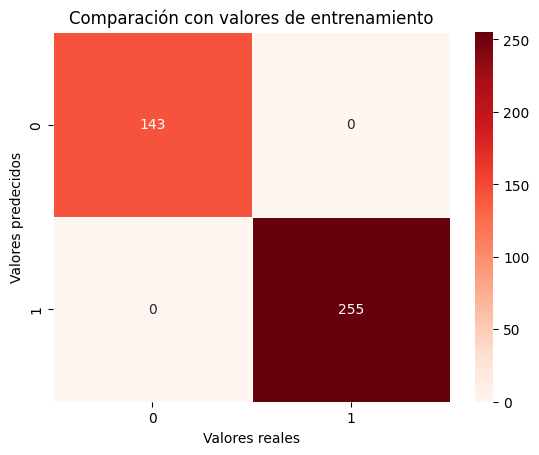

In [16]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

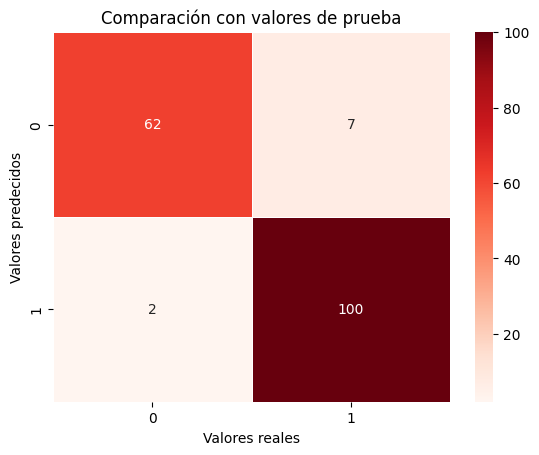

In [17]:
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de prueba')
plt.show()

# Visualizando la importancia de las características al modelo

In [18]:
clf.feature_importances_

array([0.06082575, 0.01203414, 0.06658116, 0.04061686, 0.00593186,
       0.00666543, 0.0483094 , 0.1377072 , 0.00651761, 0.0033341 ,
       0.01013671, 0.00402787, 0.01082128, 0.02542445, 0.00367185,
       0.00539079, 0.00956575, 0.0063813 , 0.00521718, 0.0043603 ,
       0.08902617, 0.0156199 , 0.12319549, 0.10808756, 0.01586751,
       0.0171118 , 0.03159618, 0.11476145, 0.0067313 , 0.00448165])

In [19]:
feature_imp = pd.Series(clf.feature_importances_, index=x.columns)
feature_imp

mean radius                0.060826
mean texture               0.012034
mean perimeter             0.066581
mean area                  0.040617
mean smoothness            0.005932
mean compactness           0.006665
mean concavity             0.048309
mean concave points        0.137707
mean symmetry              0.006518
mean fractal dimension     0.003334
radius error               0.010137
texture error              0.004028
perimeter error            0.010821
area error                 0.025424
smoothness error           0.003672
compactness error          0.005391
concavity error            0.009566
concave points error       0.006381
symmetry error             0.005217
fractal dimension error    0.004360
worst radius               0.089026
worst texture              0.015620
worst perimeter            0.123195
worst area                 0.108088
worst smoothness           0.015868
worst compactness          0.017112
worst concavity            0.031596
worst concave points       0

In [20]:
feature_imp = feature_imp.sort_values(ascending = False)
feature_imp

mean concave points        0.137707
worst perimeter            0.123195
worst concave points       0.114761
worst area                 0.108088
worst radius               0.089026
mean perimeter             0.066581
mean radius                0.060826
mean concavity             0.048309
mean area                  0.040617
worst concavity            0.031596
area error                 0.025424
worst compactness          0.017112
worst smoothness           0.015868
worst texture              0.015620
mean texture               0.012034
perimeter error            0.010821
radius error               0.010137
concavity error            0.009566
worst symmetry             0.006731
mean compactness           0.006665
mean symmetry              0.006518
concave points error       0.006381
mean smoothness            0.005932
compactness error          0.005391
symmetry error             0.005217
worst fractal dimension    0.004482
fractal dimension error    0.004360
texture error              0

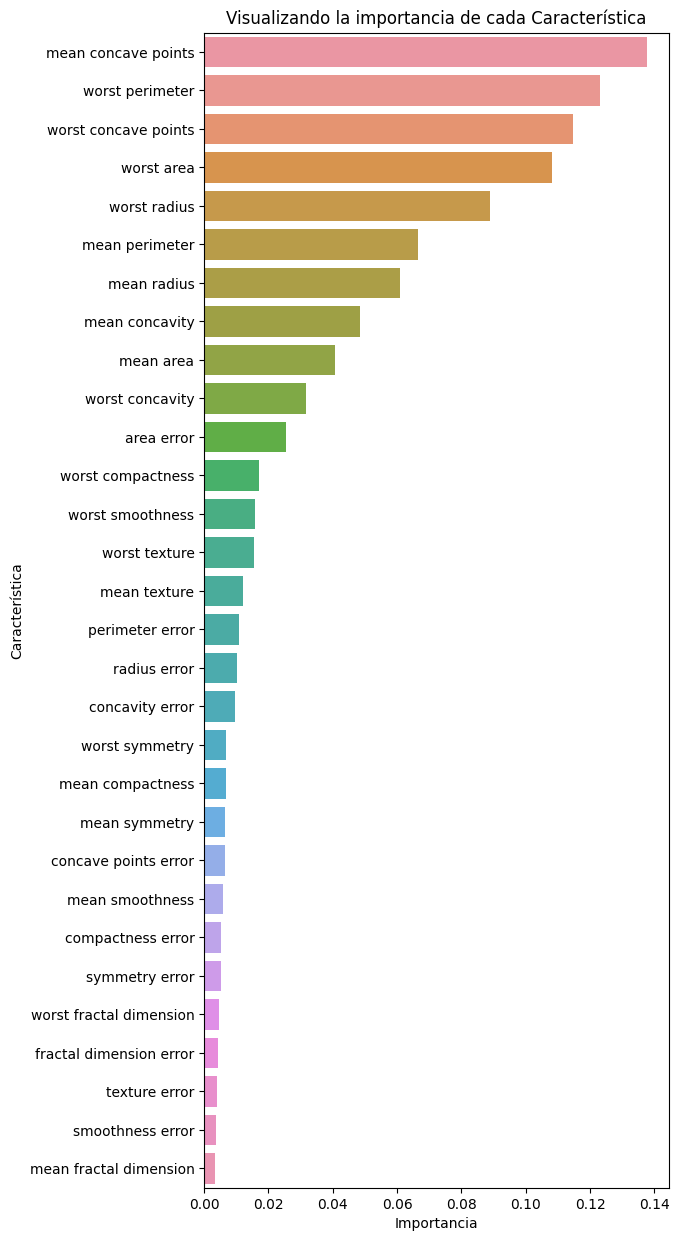

In [22]:
plt.figure(figsize=(6,15))
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title("Visualizando la importancia de cada Característica")
plt.show()

# Hagamos una base de datos resumida tomando en cuenta los cinco datos más representativos

In [ ]:
feature_imp.head()

In [ ]:
feature_imp.index[0]

In [ ]:
columns = []
for i in range(5):
    columns.append(feature_imp.index[i])

columns

In [ ]:
df_reduced = pd.DataFrame(columns = columns)
df_reduced.head()

In [ ]:
for i in range(5):
    df_reduced[feature_imp.index[i]] = df[feature_imp.index[i]]
    
df_reduced.head()

In [ ]:
x = df_reduced
y = df.Target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=100)

clf = RandomForestClassifier(n_estimators=100, random_state=100)

clf.fit(x_train, y_train)

y_train_predict = clf.predict(x_train)
y_test_predict = clf.predict(x_test)

print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de prueba')
plt.show()

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index = x.columns)
feature_imp = feature_imp.sort_values(ascending = False)

plt.figure(figsize=(6,4))
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title("Visualizando la importancia de cada Característica")
plt.show()